__霍夫曼编码__

具体步骤为
1. 将信源符号按出现概率减小的顺序排列；
2. 将两个最小的概率组合相加，并继续这一步骤，始终将较高的概率分支放在上部，直到概率达到1为止；
3. 对每对组合中的上边一个指定为1(0)，下边一个指定为0(1)；
4. 画出由概率1处到每个信源符号概率的路径，顺序记下沿路径的1和0，所得即为该符号的霍夫曼码字。

In [134]:
using Random;
N = 5;
# 符号
a = shuffle!([string('a' + i) for i in 0:N-1]);
# 出现概率
p = sort(abs.(randn(N)), rev=true);
p = p/sum(p);
# p = [0.4,0.2,0.2,0.1,0.1];
nodes = [(sym=a[i], self=i, left=i, right=i)=>p[i] for i in 1:N]

5-element Vector{Pair{NamedTuple{(:sym, :self, :left, :right), Tuple{String, Int64, Int64, Int64}}, Float64}}:
 (sym = "a", self = 1, left = 1, right = 1) => 0.29539835611053017
 (sym = "e", self = 2, left = 2, right = 2) => 0.26269597968535136
 (sym = "c", self = 3, left = 3, right = 3) => 0.21510870279952993
 (sym = "d", self = 4, left = 4, right = 4) => 0.14039752999849361
 (sym = "b", self = 5, left = 5, right = 5) => 0.086399431406095

In [144]:
# 每一步总是使概率最低的两个符号构成一对
# 一种构建方法
function huffman_encode(lst)
    nodetree = copy(lst);
    nodes2 = copy(lst);
    idx = N+1;
    while length(nodes2)>1
        x, y = pop!(nodes2), pop!(nodes2);
        z = (sym=string(first(y).sym,first(x).sym),
            self=idx, 
            left=first(y).self, 
            right=first(x).self)=>(last(x)+last(y));
        push!(nodetree, z);
        push!(nodes2, z);
        sort!(nodes2, lt=(x,y)->begin 
                        if(last(x) ≈ last(y)) return first(x).self<first(y).self;
                        else return last(x)>last(y);
                        end
                    end);
        idx = idx + 1;
    end
    return nodetree;
end
nodetree = huffman_encode(nodes)

9-element Vector{Pair{NamedTuple{(:sym, :self, :left, :right), Tuple{String, Int64, Int64, Int64}}, Float64}}:
     (sym = "a", self = 1, left = 1, right = 1) => 0.29539835611053017
     (sym = "e", self = 2, left = 2, right = 2) => 0.26269597968535136
     (sym = "c", self = 3, left = 3, right = 3) => 0.21510870279952993
     (sym = "d", self = 4, left = 4, right = 4) => 0.14039752999849361
     (sym = "b", self = 5, left = 5, right = 5) => 0.086399431406095
    (sym = "db", self = 6, left = 4, right = 5) => 0.2267969614045886
   (sym = "dbc", self = 7, left = 6, right = 3) => 0.44190566420411853
    (sym = "ae", self = 8, left = 1, right = 2) => 0.5580943357958815
 (sym = "aedbc", self = 9, left = 8, right = 7) => 1.0

In [145]:
# 另一种构建方法构建(本质上只是处理多个概率相同的符号的顺序不同)
function huffman_encode_a(lst)
    nodetree = copy(lst);
    nodes2 = copy(lst);
    idx = N+1;
    while length(nodes2)>1
        x, y = pop!(nodes2), pop!(nodes2);
        z = (sym=string(first(y).sym,first(x).sym),
            self=idx, 
            left=first(y).self, 
            right=first(x).self)=>(last(x)+last(y));
        push!(nodetree, z);
        push!(nodes2, z);
        sort!(nodes2, lt=(x,y)->begin 
                    if(last(x) ≈ last(y)) return first(x).self>first(y).self;
                    else return last(x)>last(y);
                    end
                end);
        idx = idx + 1;
    end
    return nodetree;
end
nodetree2 = huffman_encode_a(nodes)

9-element Vector{Pair{NamedTuple{(:sym, :self, :left, :right), Tuple{String, Int64, Int64, Int64}}, Float64}}:
     (sym = "a", self = 1, left = 1, right = 1) => 0.29539835611053017
     (sym = "e", self = 2, left = 2, right = 2) => 0.26269597968535136
     (sym = "c", self = 3, left = 3, right = 3) => 0.21510870279952993
     (sym = "d", self = 4, left = 4, right = 4) => 0.14039752999849361
     (sym = "b", self = 5, left = 5, right = 5) => 0.086399431406095
    (sym = "db", self = 6, left = 4, right = 5) => 0.2267969614045886
   (sym = "dbc", self = 7, left = 6, right = 3) => 0.44190566420411853
    (sym = "ae", self = 8, left = 1, right = 2) => 0.5580943357958815
 (sym = "aedbc", self = 9, left = 8, right = 7) => 1.0

In [28]:
# 显示树结构
using TikzGraphs, Graphs;
function plottree(tree)
    tr = copy(tree);
    g = DiGraph(2*N-1);
    while length(tr) > 1
        t = first(pop!(tr));
        if(t.self == t.left) 
            continue;
        end
        add_edge!(g, t.self, t.left);
        add_edge!(g, t.self, t.right);
    end
    TikzGraphs.plot(g, map(x->first(x).sym, tree), options="scale=3")
end

plottree (generic function with 1 method)

In [29]:
# 用编码表示
function tocode(tree)
    tr = first.(copy(tree));
    tr[end] = (sym="", 
                self=tr[end].self, 
                left=tr[end].left, 
                right=tr[end].right);
    for i in 1:N-1
        x = pop!(tr);
        tr[x.left] = (sym=string(x.sym,"1"),
                        self=tr[x.left].self, 
                        left=tr[x.left].left, 
                        right=tr[x.left].right);
        tr[x.right] = (sym=string(x.sym,"0"),
                        self=tr[x.right].self, 
                        left=tr[x.right].left, 
                        right=tr[x.right].right);
    end
    return map((x,y)->(x=>y),a,map(x->x.sym,tr));
end

tocode (generic function with 1 method)

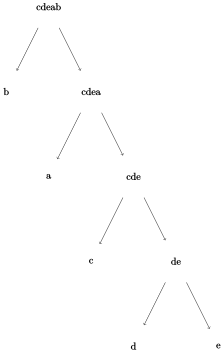

In [126]:
plottree(nodetree)

In [129]:
dic1 = tocode(nodetree)

5-element Vector{Pair{String, String}}:
 "b" => "0"
 "a" => "10"
 "c" => "111"
 "d" => "1101"
 "e" => "1100"

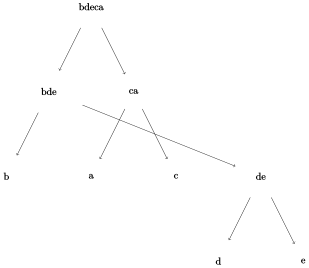

In [127]:
plottree(nodetree2)

In [128]:
dic2 = tocode(nodetree2)

5-element Vector{Pair{String, String}}:
 "b" => "11"
 "a" => "00"
 "c" => "01"
 "d" => "101"
 "e" => "100"

In [130]:
# 比较两种编码方式的性能
code1 = last.(dic1);
code2 = last.(dic2);
# 平均字长
len1 = sum(map((x,y)->length(x)*y, code1, p))
len2 = sum(map((x,y)->length(x)*y, code2, p))
println(len1 == len2)
# 同为Huffman编码，效果相同
# 平均码长方差
σ1 = sum(map((c,p)->p*(length(c)-len1)^2, code1, p))
σ2 = sum(map((c,p)->p*(length(c)-len2)^2, code2, p))
println(σ1, "\n", σ2)
# 相比之下，方差小的码更紧凑，码的变化小

true
1.3599999999999999
0.16


In [12]:
# BeautifulAlgorithm.jl给出的实现
function huffman_coding(C::Vector{Char}, F::Vector{<:Real})
    N = Dict{Any,Any}(Pair.(C, F))
    while length(N) > 1
        X = findmin(N)
        delete!(N, last(X))
        Y = findmin(N)
        delete!(N, last(Y))
        children = (left=last(X), right=last(Y))
        Z = Pair(children, first(X) + first(Y))
        push!(N, Z)
    end
    return first(first(N))
end

huffman_coding (generic function with 1 method)

In [13]:
huffman_coding(shuffle!([Char('a' + i) for i in 0:N-1]),p)

(left = 'b', right = (left = (left = 'd', right = 'c'), right = (left = 'a', right = 'e')))

仅当信源符号出现概率为pj=2^-k时,霍夫曼编码的效率才能达到100%,为了更有效地编码,可以合并信源信号

In [137]:
# 信息熵
H(p) = sum(map(x->-x*log10(x),p));
h = H(p);
println(h)
# 编码效率
println(h/len1, "\n", h/len2);

0.6640923908445882
0.301860177656631
0.301860177656631


In [179]:
# 当一个编码对应k个符号
using Combinatorics;
function combinesym(lst, K)
    n = length(lst);
    idx = 1;
    nodes3 = [];
    combinearray = [];
    for i in 1:n
        for j in 1:n
            push!(combinearray, [i,j]);
        end
    end
    for i in combinearray
        sym = "";
        px = 1;
        for j in i
            sym = string(sym, first(lst[j]).sym);
            px = px * last(lst[j]);
        end
        push!(nodes3, (sym=sym, self=idx, left=idx, right=idx)=>px);
        idx = idx + 1;
    end
    return nodes3;
end
a2 = ["a", "b"];
p2 = sort(abs.(randn(2)), rev=true);
p2 = p2/sum(p2);
nodes3 = combinesym([(sym=a2[i], self=i, left=i, right=i)=>p2[i] for i in 1:2], 2)

4-element Vector{Any}:
 (sym = "aa", self = 1, left = 1, right = 1) => 0.6633801440136203
 (sym = "ab", self = 2, left = 2, right = 2) => 0.15110137450820613
 (sym = "ba", self = 3, left = 3, right = 3) => 0.15110137450820613
 (sym = "bb", self = 4, left = 4, right = 4) => 0.03441710696996742

In [191]:
tree3 = huffman_encode(nodes3)
code3 = map(x->x.sym,first.(tree3));
p3 = last.(tree3);
len3 = sum(map((x,y)->length(x)*y, code3[1:4], p3[1:4]))
# 编码效率
H(p3)/len3

0.35576421463300295